UM MSBA - BGEN632

# Week 9: Statistics in Python

The purpose of this tutorial is to help you become familiar with performing descriptive and inferential statistics in Python. 

We will begin with a brief overview of statistics to introduce basic terms and concepts. You may already be familiar with them, but we will cover them to ensure we have a bit of common foundational knowledge given the variety of students in our course. 

We will then move on to a high-level discussion of statistical approaches and their implementation in Python. 
1. Collecting data and analyzing it (*descriptive* statistics)
    * Important step in familiarizing yourself with data
    * Helps determine type of analysis that can be perform on data
2. Using this to draw conclusions about a population
(*inferential* statistics)
    * Includes both predictive and prescriptive analysis

---

Let's prepare out notebook before jumping into some math.

## Notebook Setup

In [1]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [2]:
# set working directory
os.chdir("C:/Users/gcassist/Desktop/MSBA/Spring 25/Python/week9labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'C:\\Users\\gcassist\\Desktop\\MSBA\\Spring 25\\Python\\week9labs\\data'

In [3]:
# load ozone data and do quick inspect
ozone_df = pd.read_table("ozone.data.txt")
ozone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rad     111 non-null    int64  
 1   temp    111 non-null    int64  
 2   wind    111 non-null    float64
 3   ozone   111 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.6 KB


In [4]:
# load car data and do quick inspect
car_df = pd.read_table('car.test.frame.txt', sep='\t')
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        60 non-null     int64  
 1   Country      60 non-null     object 
 2   Reliability  49 non-null     float64
 3   Mileage      60 non-null     int64  
 4   Type         60 non-null     object 
 5   Weight       60 non-null     int64  
 6   Disp.        60 non-null     int64  
 7   HP           60 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 3.9+ KB


In [5]:
# load student data and do quick inspect
student_df = pd.read_table('class_performance.txt')
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StudentID  69 non-null     int64  
 1   Section    69 non-null     int64  
 2   Homework   69 non-null     float64
 3   Exam       69 non-null     float64
 4   Project    69 non-null     float64
 5   Prof       69 non-null     float64
 6   Grade      69 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 3.9+ KB


---

## Statistics Overview

The real world is random and uncertain. We need a way to describe, predict, and draw conclusions from observations in the real world. We do this using **statistics**. 

In the statistical analysis of data, we typically use data from a few selected samples to draw conclusions about the population from which these samples were taken. 
  * *Population* - includes all of the elements from a set of data; the thing in which we are interested . . . "truth".
  * *Parameters* - the defining characteristics of a population.

Since the parameters characterizing the population are unknown, we have to use samples to obtain *estimates* of those parameters. When estimating a parameter of a population, we typically cannot measure all subjects or elements. In other words, we usually cannot accurately know populations or the parameters describing a population.

We have to limit ourselves to investigating a *sample* taken from this group. We have to collect examples from the population and characterize these examples. Correct study design should ensure that the sample data are *representative* of the population from which the samples were taken.

* *Sample* - subset of a population that we collect and can describe; consists of one or more observations from the population.

Based on the *sample statistic*, i.e., the corresponding value calculated from the sample data, we use statistical inference to draw conclusions about the corresponding parameter in the population.

* *Statistical inference* — enables you to make an educated guess about a population parameter based on a statistic computed from a representative sample from that population.

Examples of parameters and statistics are provided below. Population parameters are often indicated using Greek letters, while sample statistics typically use standard letters.

|  | Sample Statistic | Population Parameter | 
|:----: |:----: |:----: |
| Mean               | $\bar{x}$ | $\mu $ |
| Standard Deviation | $sd$ | $\sigma$ |

### Point vs. Summary Statistic

Sometimes we use the word "statistic" to refer to a characteristic of data. 

* *Point* Statistic - a specific measured value (e.g., I am 1.524 meters tall).
* *Summary* Statistic - a value representing a characteristic of many values (e.g., average height of UM faculty).
  
Summary statistics are a building block for analytical work. Summaries are abstract *descriptions* of a sample or population. Distributions of summary statistics can be used to make *inferences* about a population.

### Exploratory Analysis to Inference

Think about sampling as something you are cooking:
* Taste (examine) a small part of what you're cooking to get an idea about the dish as a whole.
* Once tasted, decide this spoonful isn't salty enough, that's *exploratory analysis*.
* If generalized and conclude that the dish needs salt, that's an *inference*.

To be valid, a sample must be *representative* of the population. If samples are not representative, they are *biased*.

Bias can have a number of sources:
* The selection of subjects.
* The structure of the experiment.
* The measurement device.
* The analysis of the data.

Selection of Subjects Example: *Sampling Bias in Surveys*
* Non-response - only a small fraction of randomly sampled  people choose to respond.
* Voluntary response - sample consists of people who volunteer to respond because they have strong opinions on the issue.
* Convenience sample - easily accessible individuals are more likely to be included in the sample.

Ultimately, care should be taken to avoid bias in the data as much as possible.

### Obtaining Good Samples

Statistical methods are based on implied randomness. Usually (reliable) sampling involves collecting data using some random framework. Randomization is used to avoid bias as much as possible, and there are different ways to randomize an experiment, including sampling. 

* Common random sampling techniques:
  * Simple sampling - randomly select cases from the population, no implied connection between the selected points.
  * Stratified sampling - strata made up of similar observations; take a simple random sample from each stratum.
  * Cluster sampling - clusters not homogeneous observations; take a simple random sample from a random sample of clusters.

### Understanding Sample Data

Recall from Week 7 that we can organize sample data in a data matrix (a table) where:
* Each row represents a specific thing observed (e.g., an employee in the table below)
* Each column represents a variable (e.g., employee ID, tenure, leadership, title in the table below)


| Employee_ID | Tenure_Months | Leadership | Title | 
|:----|:---- |:---- |:---- |
| e1 | 45 | $$True$$ | Project Manager |
| e2 | 2 | $$False$$ | Junior Analyst |
| e3 | 13 | $$False$$ | Adminstrative Assistant |
| . | . | . | . |
| . | . | . | . |
| e63 | 19 | $$True$$ | Senior Engineer |


#### Types of Variables

The variable type represented in a column determines our options for analysis. Stated another way, the choice of appropriate statistical procedure, including visualization techniques, depends on the data type. 

Data can be categorical or numerical. If the variables are numerical, we are led to a certain statistical strategy. In contrast, if the variables represent qualitative categorizations, then we follow a different path.

* Numerical - numeric values
  * Discrete - integers, counting numbers, etc. (e.g., 1, 2, 3,)
  * Continuous - real values (e.g., -1.2, $\pi$, 5.2)
* Categorical - non-numeric values
  * Ordinal - values are classified in categories that can be ordered and have a logical sequence (e.g., tall, medium, short; very few, some, very many)
  * Nominal - values are classified in categories that cannot be ordered (e.g., red, blue, green; married, single, divorced)
    * Boolean - can only have two possible values (e.g., 0/1; yes/no; smoker/non-smoker; True/False)

In the fictional employee data above, we might be interested in analyzing the relationship between tenure, leadership, and title. One of our first steps towards analysis is determining variable type. 

Question: *What are the variable types for tenure, leadership, and title as displayed in the data table above?*

<details>
    <summary><font color="blue">Click here to see the answer</font></summary>

* Tenure: Numerical, discrete
* Leadership: Categorical, boolean
* Title: Categorical, nominal
</details>

### Other Important Topics

Comprehensive discussion of probabilities is well outside the scope of this course. However, if you would like to learn more or need a refresher, check out the freely available text by Grimstead and Snell, [Introduction to Probability](https://math.dartmouth.edu/~prob/prob/prob.pdf).

## Descriptive Statistics

Descriptive analysis typically deals with *data understanding* and *data preparation*. This involves identifying the data for a project, collecting the data, assessing the quality of the data, preparing the data (cleaning, transforming, converting), summarizing the data (often with visualizations), and finally selecting the final variables and observations. We can think of descriptive analysis as a process aimed at describing the data. 

Descriptive statistics utilizes summaries of data. These include counts, minimums, maximums, mean, median, mode, standard deviation, and others. These summaries do not infer anything about the data, but *describe* the characteristics of the data.

|Measure of| Statistic  | Description | 
|:----|:----|:---- |
|*Center*| Mean | Statistical average of numeric data |
| | Median | Middle-most value of numeric data, when sorted  |
|| Mode | Most common value of categorical data |
|| Proportion | Frequency with which some categorical value occurs |
|*Spread*| Range | Difference between max and min values of numerical data |
|| Quartiles | Values occurring at the $\frac{1}{4}$ ($Q_1$), $\frac{1}{2}$ ($Q_2$), and $\frac{3}{4}$ ($Q_3$) positions in numeric data, when sorted |
|| Interquartile Range | Difference between the $Q_3$ and $Q_1$ quartile points in numeric data |
|| Variance | Average squared distance between each point and the mean |
|| Standard Deviation | Square root of the variance |

As mentioned above, visualization is a key component of conducting any analysis. Visualizations are graphs, plots, figures, and other visual representations of the data that provide a summarized perspective on the data. The topic of data visualization deserves its own course as it is a complex and critical process in analytics, blending science and art to help us make sense of data and support claims based on data. For our course, we are limited to a cursory review of visualization.

Let's discuss how to compute various descriptive statistics in Python. We set up our notebook at the beginning of this tutorial (importing modules and data, and setting our working directory), so we are ready to go.

There are many ways to assess the basic descriptive information of data. Python's pandas library provides two functions that behave similarly to `summary()` and `str()` in R. These two functions are `describe()` and `dtypes`. The former provides an overview like `summary()`, providing basic descriptive information for numeric and categorical data. The attribute, `dtypes`, only provides the datatype of the columns, unlike `str()` in R that provides more information beyond datatypes.

Run the code cells below to use `describe()` with the cars and ozone data sets. The output provides count, mean, standard deviation, minimum value ($Q_0$), the values for the 25th ($Q_1$), 50th ($Q_2$), and 75th ($Q_3$) quartiles, and the maximum value ($Q_4$).

In [6]:
ozone_df.describe()

,rad,temp,wind,ozone
count,111.000000,111.000000,111.000000,111.000000
mean,184.801802,77.792793,9.938739,42.099099
std,91.152302,9.529969,3.559218,33.275969
min,7.000000,57.000000,2.300000,1.000000
25%,113.500000,71.000000,7.400000,18.000000
50%,207.000000,79.000000,9.700000,31.000000
75%,255.500000,84.500000,11.500000,62.000000
max,334.000000,97.000000,20.700000,168.000000


In [7]:
car_df.describe()

,Price,Reliability,Mileage,Weight,Disp.,HP
count,60.000000,49.000000,60.000000,60.000000,60.000000,60.000000
mean,12615.666667,3.387755,24.583333,2900.833333,152.050000,122.350000
std,4082.935753,1.455111,4.791559,495.866103,54.160911,30.980489
min,5866.000000,1.000000,18.000000,1845.000000,73.000000,63.000000
25%,9932.500000,2.000000,21.000000,2571.250000,113.750000,101.500000
50%,12215.500000,3.000000,23.000000,2885.000000,144.500000,111.500000
75%,14932.750000,5.000000,27.000000,3231.250000,180.000000,142.750000
max,24760.000000,5.000000,37.000000,3855.000000,305.000000,225.000000


Recall that the car data contains eight columns of data. But, the output for `car_df.describe()` only presents six columns worth of descriptive data. Why?

The reason is, the two columns left out are string/categorical, not numeric. The `describe()` function in pandas has additional arguments (and some beyond these):

* `describe(include=['object'])`: focuses just on string data
* `describe(include=['category'])`: focuses just on categorical data
* `describe(include=['number'])`: solely looks at numerical data
* `describe(include='all')`: forces Python to assess both types


Let's return to the car data and use the `include=['object']` argument. Note the differences of the output. We can confirm earlier findings by using the argument `include=['number']`.

In [8]:
car_df.describe(include=['object'])

,Country,Type
count,60,60
unique,8,6
top,USA,Compact
freq,26,15


In [9]:
car_df.describe(include=['number'])

,Price,Reliability,Mileage,Weight,Disp.,HP
count,60.000000,49.000000,60.000000,60.000000,60.000000,60.000000
mean,12615.666667,3.387755,24.583333,2900.833333,152.050000,122.350000
std,4082.935753,1.455111,4.791559,495.866103,54.160911,30.980489
min,5866.000000,1.000000,18.000000,1845.000000,73.000000,63.000000
25%,9932.500000,2.000000,21.000000,2571.250000,113.750000,101.500000
50%,12215.500000,3.000000,23.000000,2885.000000,144.500000,111.500000
75%,14932.750000,5.000000,27.000000,3231.250000,180.000000,142.750000
max,24760.000000,5.000000,37.000000,3855.000000,305.000000,225.000000


A quick aside, in previous tutorials, I included whitespace around the `=` operator in function parameters. I did this to emphasize the value assigned to a parameter. However, the PEP8 style guide recommends an absence of spaces around this operator in function parameter assignments in order to distinguish them from other types of assignment (e.g., variable assignment). 

Okay, back to our data. Recall that when pandas imports data into Python as a DataFrame, it does not automatically convert columns into categorical datatypes. To do so, we must convert the datatype of a column into categorical and then append it to the DataFrame. 

Let's convert *Country* column in the car data set into a categorical datatype and append it to the DataFrame. We will then use `columns` to view our newly created column.

In [10]:
car_df['Country_categorical'] = car_df['Country'].astype('category')

car_df.columns

Index(['Price', 'Country', 'Reliability', 'Mileage', 'Type', 'Weight', 'Disp.',
       'HP', 'Country_categorical'],
      dtype='object')

Looking at the listed columns, the newly created column `Country_categorical` is listed at the end. 

The datatype of `Country` is still `object`, while the datatype of `Country_categorical` is `category`:

In [11]:
car_df.dtypes

Price                     int64
Country                  object
Reliability             float64
Mileage                   int64
Type                     object
Weight                    int64
Disp.                     int64
HP                        int64
Country_categorical    category
dtype: object

Let's repeat the earlier process for `describe()`, only this time for data types of `object` and `category`:

In [12]:
car_df.describe(include=['object'])

,Country,Type
count,60,60
unique,8,6
top,USA,Compact
freq,26,15


In [13]:
car_df.describe(include=['category'])

,Country_categorical
count,60
unique,8
top,USA
freq,26


The following table provides a list of the most fundamental descriptive functions within the pandas library, including those for skewness and kurtosis (both of these are measures of distribution *shape*).

| Function | Description |
|:---|:---|
| count() | Number of non-null observations |
| sum() | Sum of values |
| mean() | Mean of values |
| mad() | Mean absolute deviation |
| median() | Arithmetic median of values |
| min() | Minimum |
| max() | Maximum |
| mode() | Mode |
| abs() | Absolute Value |
| prod() | Product of values |
| std() | Sample standard deviation |
| var() | Unbiased variance |
| sem() | Standard error of the mean |
| skew() | Sample skewness (3rd moment) |
| kurt() | Sample kurtosis (4th moment) |
| quantile() | Sample quantile (value at %) |

In order to determine the skewness and kurtosis within Python, separate functions must be run. Similar to R, these functions can be run separately for each column or on the entire DataFrame. 

In [14]:
# get kurtosis value for the Mileage variable in car data set
car_df["Mileage"].kurt()

-0.12946758079837073

Many other useful functions exist for categorical data within pandas. For example, it is possible to add additional categories, remove categories not currently used in the dataset, change the existing categories, and consolidate categories. [Check out the pandas documentation for more details on how to perform these operations](https://pandas.pydata.org/docs/user_guide/categorical.html).

### Plots in Python

Often, numbers on their own may not be intuitive. Humans are fine-tuned to interpret visual objects more readily than numerical data. It can be helpful to create plots to assess your data in addition to looking at summary statistics. The variable types in data inform our selection of data visualization types:

* Numeric data
  * Scatterplot: useful for visualizing the relationship between two numerical variables.
  * Histogram: provide a view of the data density and help describe distribution shape; sensitive to bin width.
  * Boxplot: the box in a box plot represents the middle 50% of the data, and the thick line in the box is the median.
* Categoric data
  * Bar plot: a common way to display a single categorical variable proportions or frequencies.
    * Stacked bar plot: extends the standard bar chart from looking at numeric values across one categorical variable to two categorical variables.
  * *Please never use a pie chart.*

##### How are bar plots different than histograms?

Bar plots are used for displaying distributions of categorical variables, while histograms are used for numerical variables. The x-axis in a histogram is a number line, hence the order of the bars cannot be changed, while in a bar plot the categories can be listed in any order (though some orderings make more sense than others, especially for ordinal variables).

Below is an example of a simple plot for time-ordered data using the function `plot()`. The code below generates a random time series.

<Axes: >

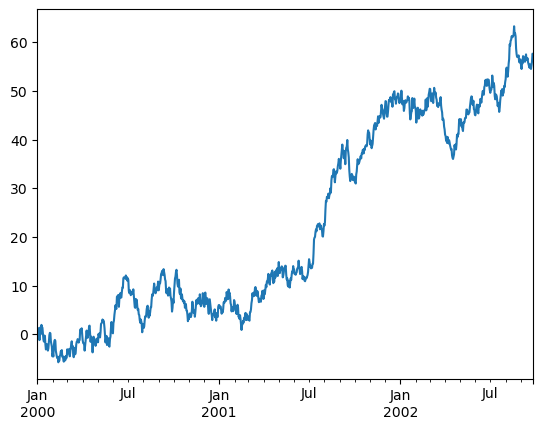

In [15]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

#### Scatterplot

The scatter plot is a popular plot used to assess data prior to modeling. The scatter plot is simple enough to use within Python. For this example, variables from the ozone dataset will be used. The variable *radiation* is placed on the *y*-axis; the variable *temperature* on the *x*-axis. This allows us to assess the relationship between variables prior to modeling. 

In general, variables might be:
* *Negatively* associated - as one one increases in value or proportion, the other tends to decrease.
* *Positively* associated - as one one increases in value or proportion, the other also tends to increase.

In the plot below, a weak positive relationship exists between *radiation* and *temperature*.

<Axes: xlabel='temp', ylabel='rad'>

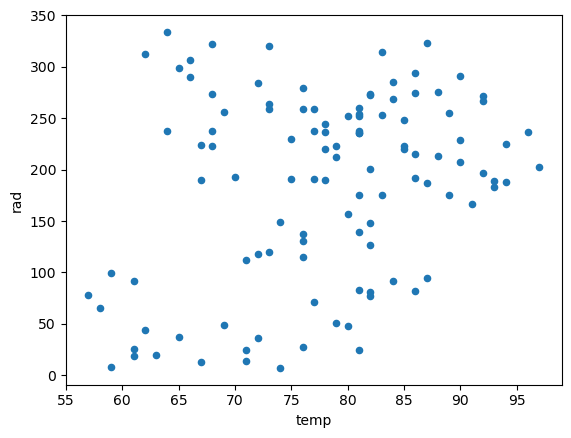

In [16]:
ozone_df.plot.scatter(x='temp', y='rad')

#### Stats Sidebar: Correlations

We can also use a *measure of relationship*, a correlation coefficient, to assess this association. A correlation coefficient measures the strength and direction of a (linear) relationship.

In the code cell below, we use the `corr()` function provided in the pandas library. NumPy and SciPy also provide functions for computing correlation coefficients.

In [17]:
ozone_df['temp'].corr(ozone_df['rad'])

0.2940876437245132

What if we want to inspect the correlations between all variables in the ozone data set? The syntax is simple with pandas: 

In [18]:
ozone_df.corr()

,rad,temp,wind,ozone
rad,1.000000,0.294088,-0.127366,0.348342
temp,0.294088,1.000000,-0.497146,0.698541
wind,-0.127366,-0.497146,1.000000,-0.612951
ozone,0.348342,0.698541,-0.612951,1.000000


#### Stats Sidebar: Explanatory and Response Variables

When two variables are associated:
* The first variable might affect the second.
* The second variable might affect the first.
* An unknown, confounding variable might affect both.

The relationship between variables might occur because of chance or bias.
* Explanatory variable - one that is suspected of affecting another.
* Response variable - one that is suspected of being affected.
  * explanatory variable &rarr; response variable
* Labeling variables in this way guarantees nothing.
* Correlation does not imply causation!

<div><center>
  <img src = "https://imgs.xkcd.com/comics/correlation.png">
  <a href="https://xkcd.com/552/">https://xkcd.com/552</a>
</center></div>

##### Look Hard Enough, There Will be Correlation

* The real world involves many, many variables that interrelate in complex ways.
* Also, chance is only "random" if you aren’t already looking for it.
* If you want to find correlation and you look hard enough, then you will find it.
* So beware of confirmation bias.
* Or just weirdness.

#### Multiple Plots

If a data set contains more than one or two variables, it may take too much time to create individual scatter plots. In R, the function `pairs()` allows us to plot scatter plots for all variables. Unfortunately, pandas does not contain such a function. We will need to plot each pair of variables. Using our knowledge of loops, we can make short work of this. I will leave that up to you to explore how it is done.

#### Boxplot

Another type of plot that we can use is the boxplot:

<Axes: >

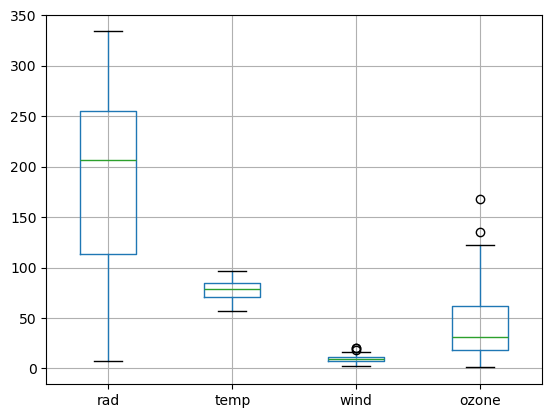

In [19]:
ozone_df.boxplot()

In this boxplot, we can see that outliers are present. Specifically, for both *wind* and *ozone*, data points lie above the horizontal bar. These are considered outliers in the data. These are data points that are either greater than 1.5 times the interquartile range or lower than 1.5 times the interquartile range. Though, *wind* is cramped making assessment difficult. Let's try removing *radiation* from the plot to bring that into focus.

<Axes: >

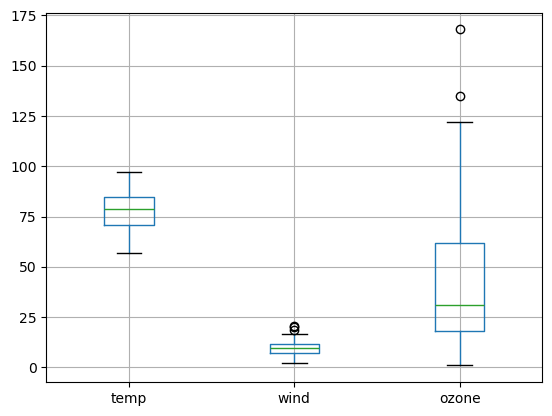

In [20]:
ozone_df.loc[:,['temp','wind','ozone']].boxplot()

That is an improvement. *Ozone* is very much skewed with outliers. Still, *wind* is still squished.

<Axes: >

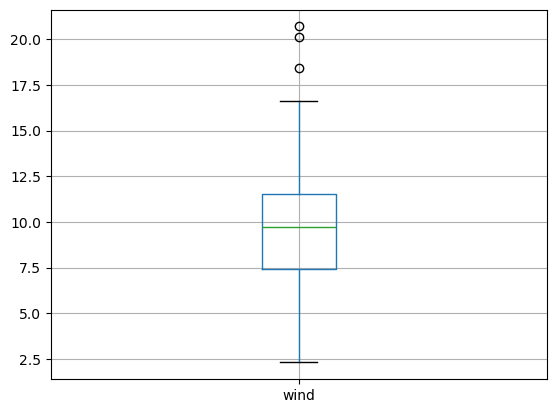

In [21]:
ozone_df.loc[:,['wind']].boxplot()

Excellent! This brings it into greater focus. You can see the outliers present at the top of the plot.

## Stats Sidebar: Outliers

Very often, when analyzing distributions, what we are really looking for is what is most unusual (outliers). This is why some types of plots make seeing outliers explicit (e.g., boxplots and strip plots). When there are extreme outliers, we often need to be more careful about other measures - for instance, median is a measure of center that is more resistant to the effects of outliers compared to mean. In other words, extreme values have a strong effect on mean.

#### Histograms 

Histograms are excellent for inspecting the *spread* of your data. A histogram provides the frequency in which certain data points appear. This also lets you eyeball the skewness and kurtosis of your data. We sometimes call this "eyeball analysis", where we use visual inspection to estimate something about data. This is a quick way to understand data but we should ultimately rely on precise and accurate calculations.

<Axes: ylabel='Frequency'>

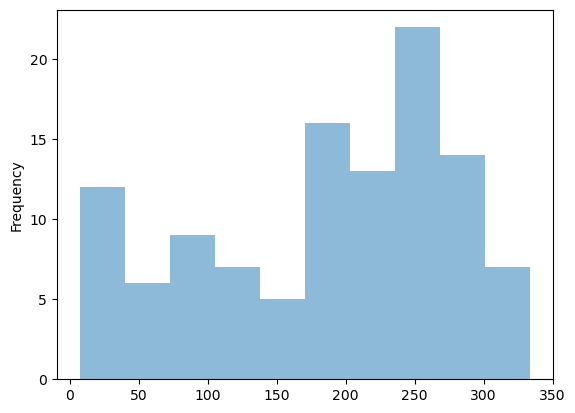

In [22]:
ozone_df['rad'].plot.hist(alpha=0.5)  # the alpha parameter is used to set the transparency level and ranges from 0 to 1

#### Bar Chart

We can use bar charts to plot categorical data:

<Axes: xlabel='Country'>

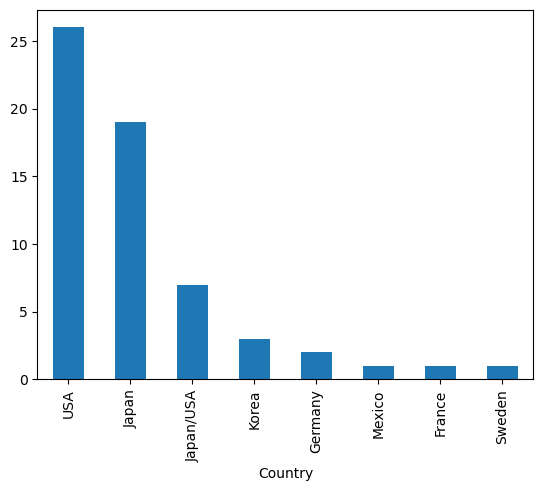

In [23]:
# vertical bar chart for car country
car_df.Country.value_counts().plot.bar()

<Axes: ylabel='Country'>

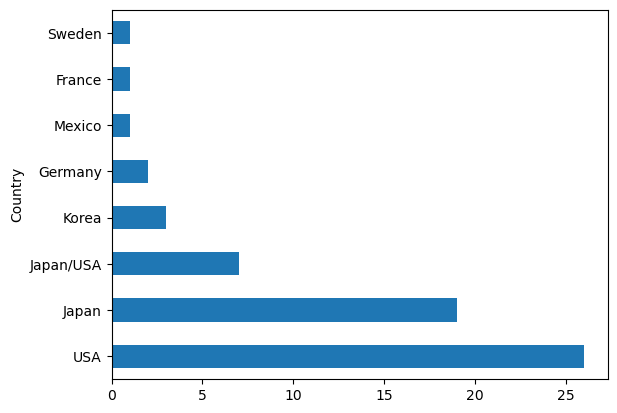

In [24]:
# horizontal bar chart for car country
car_df.Country.value_counts().plot.barh()

<Axes: ylabel='Type'>

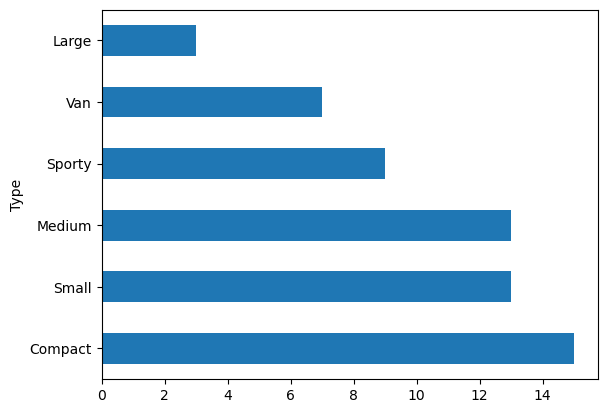

In [25]:
# horizontal bar chart for car type
car_df.Type.value_counts().plot.barh()

Note that the first two plots use the exact same data. One is a vertical bar chart while the other is horizontal. 

Vertical bar charts are especially well suited for plotting ordinal data where there is a logical, natural sequence (e.g., age groups, income brackets, etc.), allowing us to exploit the way we perceive increasing values or time for efficient, fast processing of information.

Horizontal bar charts are well suited for plotting nominal variables, allowing us to easily read category labels and inspect numerical differences between those categories. 

#### Matplotlib

You can check out a variety of example plots and their implementation in the [matplotlib gallery](https://matplotlib.org/stable/gallery/). Click on a plot to view the corresponding code.

### From Descriptive to Inferential

In analytics work, we first make use of descriptive statistics to understand our data. This includes (1) aggregating and sampling data to be analyzed with inferential statistics and (2) uncovering opportunities and constraints for selecting approaches and techniques for statistical modeling of our data. If the final set of data selected at the end of our descriptive, exploratory analysis contains errors or the wrong scope for the question asked, then the inferential statistics techniques applied to the data will incorrectly answer the question of interest. This is why a lot of the resources and time for data analysis are focused on data description and summarization. Get it wrong, and the rest of the project suffers. With that said, we now shift our discussion to inferential statistics.

## Inferential Statistics

We use inferential statistics in both predictive and prescriptive analysis. 

In *predictive* analysis, we apply statistical procedures and techniques to analyze some subset of data. That subset may have been selected when computing descriptive statistics and inspecting data (a posteriori - from observation), or it may be based on theory and hypotheses that guided data collection and preparation (a priori - from deduction). 

Predictive analysis involves developing models that predict or forecast outcomes. Examples of these outcomes include purchasing behavior, flight pathway of an airline, stock market trends, and much more. Models are assessed for viability, reliability, and consistency across contexts and domains.

In *prescriptive* analysis, we also build models, but with a different goal in mind. These models are developed to help us evaluate and recommended changes to organizational decisions and processes. 

Predictive analysis often focuses on what *will* happen, rather than suggesting what *should* happen like in prescriptive analysis. Many of the statistical models utilized in prescriptive analysis are the same as those in predictive analysis. 

In this section of the tutorial, we will focusing on how to build simple regression models, including logistic regression.

### Assumption Validation

When performing regression, we need to meet a set of *assumptions*. These assumptions are based on the conditions that need to be met in order to determine if the selected model is appropriate for the data. If the data are not appropriate for the model, then the constructed model and associated results are not valid. 

For regression models, we must meet the following criteria: 
* Linearity: linear relationship exists
* Correlation: the independent variables (i.e., explanatory or predictor variables) are not related to each other
* Homoscedasticity: residuals exhibit a constant variance
* Independence: residuals are not related to each other
* Normality: residuals exhibit a normal distribution


### Linearity

To check the linearity of radiation against ozone concentration, we can create and inspect the scatterplot:

<Axes: xlabel='rad', ylabel='ozone'>

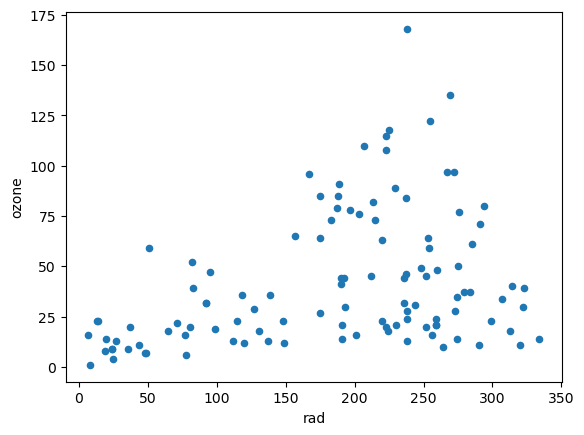

In [26]:
ozone_df.plot.scatter(x='rad', y='ozone')

This is fairly linear and does not exhibit any curvature or other anomalies that would raise a red flag. Linearity is not an issue.


### Correlation

The next assumption to check is that of multicollinearity. The first method is correlation analysis. The code cells below provide two examples. The first code cell provides correlation comparisons for all variables without *p*-values (we computed this earlier). The subsequent code cells provides *p*-values, but for a single pair of variables per cell. You could place each of these in a single code cell but you will need to wrap each line with the `print()` function or change your default notebook behavior to display all output.

In [27]:
ozone_df.corr()

,rad,temp,wind,ozone
rad,1.000000,0.294088,-0.127366,0.348342
temp,0.294088,1.000000,-0.497146,0.698541
wind,-0.127366,-0.497146,1.000000,-0.612951
ozone,0.348342,0.698541,-0.612951,1.000000


In [28]:
pearsonr(ozone_df.rad, ozone_df.ozone)

PearsonRResult(statistic=0.34834169299360274, pvalue=0.0001793108571648858)

In [29]:
pearsonr(ozone_df.wind, ozone_df.ozone)

PearsonRResult(statistic=-0.612950752214463, pvalue=8.652396430364767e-13)

In [30]:
pearsonr(ozone_df.temp, ozone_df.ozone)

PearsonRResult(statistic=0.6985414096486392, pvalue=1.5526772293928955e-17)

In [31]:
pearsonr(ozone_df.rad, ozone_df.wind)

PearsonRResult(statistic=-0.1273656239881815, pvalue=0.18282003276997197)

In [32]:
pearsonr(ozone_df.rad, ozone_df.temp)

PearsonRResult(statistic=0.29408764372451346, pvalue=0.001730785646320294)

In [33]:
pearsonr(ozone_df.wind, ozone_df.temp)

PearsonRResult(statistic=-0.4971459109200429, pvalue=2.851176151383088e-08)

An alternative method to assessing multicollinearity is using a variance inflation factor, or VIF for short. Like in R, the regression is performed prior to calculating the VIF scores. This assumes we have already created a regression object `lin_reg_1`.

In [34]:
# use the sklearn library for regression
lin_reg_1 = LinearRegression(fit_intercept=True)
lin_reg_1.fit(ozone_df[['rad', 'wind', 'temp']], ozone_df.ozone)

# calculate VIF for radiation
lin_reg_1.fit(ozone_df[['wind', 'temp']], ozone_df.rad)
vif1 = 1/(1 - lin_reg_1.score(ozone_df[['wind', 'temp']], ozone_df.rad))

# calculate VIF for wind
lin_reg_1.fit(ozone_df[['rad', 'temp']], ozone_df.wind)
vif2 = 1/(1 - lin_reg_1.score(ozone_df[['rad', 'temp']], ozone_df.wind))

# calculate VIF for temperature
lin_reg_1.fit(ozone_df[['rad', 'wind']], ozone_df.temp)
vif3 = 1/(1 - lin_reg_1.score(ozone_df[['rad', 'wind']], ozone_df.temp))

# output VIF scores
print('VIF rad: ', vif1,
        '\nVIF wind: ', vif2,
        '\nVIF temp: ', vif3)

VIF rad:  1.0952410154588483 
VIF wind:  1.3289788181604525 
VIF temp:  1.4312011945842256


The regression library does not contain a function to calculate the VIF scores. The code above is a simple calculation for each variable.

### Constant Variance: Homoscedasticity

The third assumption assessed for regression is homoscedasticity, or constant variance. Unfortunately, the regression function `LinearRegression().fit()` from the library `sklearn` cannot provide the predicted values in order to generate the plot. Instead, we must use the library `statsmodels` and its function `ols().fit()`. OLS is shorthand for Ordinary Least Squares. This approach attempts to fit a model that minimizes the square of distance of each point from the model regression line.

Please note, the `sklearn` and `statsmodels` libraries require overlapping support libraries which can cause errors if you use both at the same time.

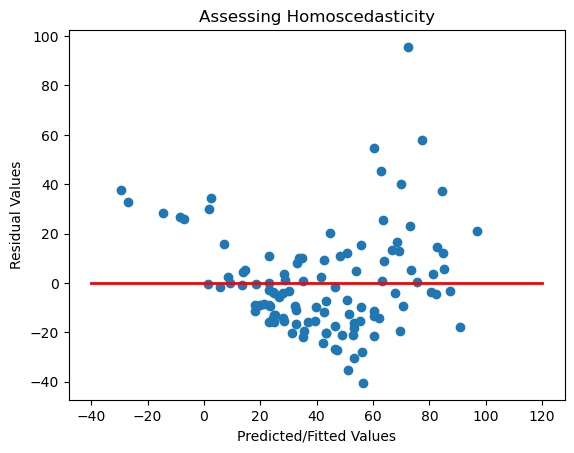

In [35]:
lin_reg_2 = smf.ols('ozone ~ rad + wind + temp', ozone_df).fit()

# assess homoscedasticity
plt.scatter(lin_reg_2.fittedvalues, lin_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([-40, 120],[0, 0], 'red', lw=2)   # add red horizontal line
plt.show()

In the plot above, the red line is generated by a line of code. The data points are not evenly distributed across the x-axis. Several data points appear to be causing this large spread. These data points are most likely outliers.

### Independence

The fourth assumption to check is that of independence of residuals. Within Python, the Durbin-Watson test statistic is obtained by viewing the summary results of the regression object. This output comes standard along with the other output. The Durbin-Watson test statistic values in the range of 1.5 to 2.5 are relatively acceptable. Values outside of this range could be a cause for worry. Values under 1 or more than 3 are a definite cause for worry.

In [36]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.91
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.45e-21
Time:                        10:11:53   Log-Likelihood:                -494.31
No. Observations:                 111   AIC:                             996.6
Df Residuals:                     107   BIC:                             1007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.2321     23.042     -2.788      0.006    -109.910     -18.554
rad            0.0598      0.023      2.580      0.011       0.014       0.106
wind          -3.3376      0.654     -5.105      0.000      -4.634      -2.041
temp           1.6512      0.253      6.516      0.000       1.149       2.154
==============================================================================
Omnibus:                       38.276   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.526
Skew:                           1.360   Prob(JB):                     4.42e-19
Kurtosis:                       6.297   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normally Distributed Residuals

The last assumption is that of normally distributed residuals. This can be assessed by creating a QQ Plot. The following code cell generates a "Probability Plot" or QQ plot.

((array([-2.4991197 , -2.1672479 , -1.97582218, -1.83751514, -1.72741673,
         -1.63498682, -1.55472837, -1.48339408, -1.41889818, -1.35981755,
         -1.30513574, -1.25410018, -1.20613729, -1.16079931, -1.11772963,
         -1.07663928, -1.03729067, -0.99948588, -0.96305815, -0.92786557,
         -0.89378625, -0.86071463, -0.82855865, -0.79723742, -0.76667945,
         -0.7368212 , -0.70760586, -0.6789824 , -0.65090474, -0.62333113,
         -0.59622353, -0.56954717, -0.54327012, -0.51736298, -0.49179855,
         -0.4665516 , -0.44159861, -0.41691764, -0.39248808, -0.36829057,
         -0.34430684, -0.32051956, -0.29691229, -0.27346937, -0.2501758 ,
         -0.22701721, -0.20397975, -0.18105005, -0.15821517, -0.13546249,
         -0.11277974, -0.09015487, -0.06757607, -0.04503166, -0.02251012,
          0.        ,  0.02251012,  0.04503166,  0.06757607,  0.09015487,
          0.11277974,  0.13546249,  0.15821517,  0.18105005,  0.20397975,
          0.22701721,  0.2501758 ,  0.

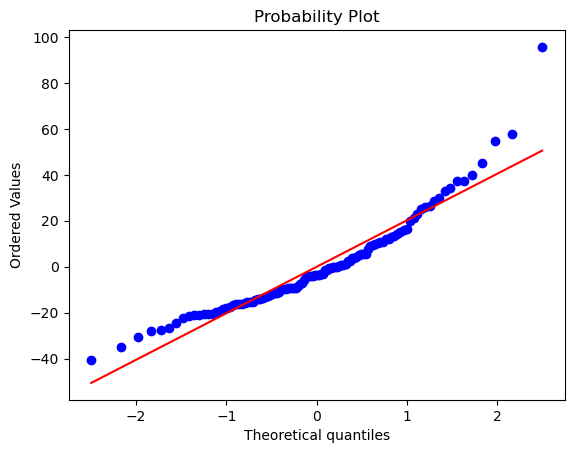

In [37]:
sts.probplot(lin_reg_2.resid, dist="norm", plot=plt)

The straight, dashed line represents a normal distribution; the circles represent the data points of your variable. Notice the data points at the tail end. These are the same data points that stood out in the test for constant variance.  

In addition to the QQ plot, you can use the Shapiro-Wilk test to evaluate normality: 

```Python
sts.shapiro(ozone_df.rad)  # check normality of radiation variable in the ozone data set
```

This is considered a more objective assessment and provides a *p*-value. Normality results in a non-significant result of the test. Importantly, the significance depends on the alpha level you choose. A more conservative approach is recommended: require an alpha of 0.05. This function also comes from the library `scipy.stats`.

### Regression in Python

We actually already built regression models above! In any case, we have two libraries to choose a regression function. Some folks may prefer the elegant output provided by `statsmodels` over `sklearn`. To be frank, I do not have a preference between the two libraries because I prefer R for the majority of my statistical analysis.

In the code below, ozone is our response variable and radiation, wind, and temperature are the selected explanatory variables. 

In [38]:
lin_reg_2 = smf.ols('ozone ~ rad + wind + temp', ozone_df).fit()

lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.91
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.45e-21
Time:                        10:15:08   Log-Likelihood:                -494.31
No. Observations:                 111   AIC:                             996.6
Df Residuals:                     107   BIC:                             1007.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.2321     23.042     -2.788      0.006    -109.910     -18.554
rad            0.0598      0.023      2.580      0.011       0.014       0.106
wind          -3.3376      0.654     -5.105      0.000      -4.634      -2.041
temp           1.6512      0.253      6.516      0.000       1.149       2.154
==============================================================================
Omnibus:                       38.276   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.526
Skew:                           1.360   Prob(JB):                     4.42e-19
Kurtosis:                       6.297   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The *F*-statistic with its accompanying *p*-value is found on the right-hand side of the output. The *t*-tests are located toward the bottom along with the *p*-values and estimates, or coefficients. The output also contains the R-Squared ($R^2$) and the (more important) Adjusted $R^2$. Lastly, a bonus is the AIC and BIC fit indices. These fit indices are meaningful when compared to the fit indices of other models (i.e., when you are trying to select the best model from a set).

* AIC - Akaike Information Criterion
* BIC - Bayesian Information Criterion

#### Problems with R-Squared

$R^2$ tells us how much variance in our dependent or response variable can be explained by the model in question. However, it has limitations.

* Every time you add a predictor to your model, $R^2$ will tend to go up, even if by chance.
* With too many predictors and too large polynomials, the model simply memorizes the data (chance and all) - *overfitting*.
* Adjusted $R^2$ compensates (somewhat) for the number of predictors used in the model.
* Predicted $R^2$ tells us how strongly correlated the model is over new data (not directly modeled) - it is a measure of *generalization* of the model.

### Logistic Regression

For this section of the tutorial, we will use the the student performance data set. In Python, the first task to be done is convert the As and Bs to numerical values. The logit function within `statsmodels` only accepts 0s and 1s as input for the target variable.

In [39]:
# determine what unique values Grade has
student_df.Grade.unique()

array(['A', 'B'], dtype=object)

In [40]:
# change values
student_df.Grade = (student_df.Grade.replace(['A','B'], [0,1])
                    .infer_objects(copy=False))  # note that a warning message will be printed about a deprecated method, you can ignore this for now

C:\Users\gcassist\AppData\Local\Temp\ipykernel_30728\1794120643.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  student_df.Grade = (student_df.Grade.replace(['A','B'], [0,1])


In [41]:
# confirm change
student_df.Grade.unique()

array([0, 1], dtype=int64)

The original unique values were listed as “A” and “B” prior to the conversion; once changed, the unique values are switched over to `0` and `1`. A strong caution needs to be added here. If the datatype of the variable is categorical, you cannot simply change the values to something different. This is because the metadata of the categorical variable most likely does not contain the new values you are using. Convert the variable to an object datatype, replace the values, then convert it back to a categorical.

Okay, let's perform logistic regression. In the code below, Grade is our response variable and Project and Exam are the selected explanatory variables. 

In [42]:
log_reg_2 = smf.logit('Grade ~ Project + Exam', student_df).fit()

log_reg_2.summary()

Optimization terminated successfully.
         Current function value: 0.317922
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Grade   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Apr 2025   Pseudo R-squ.:                  0.5250
Time:                        10:16:47   Log-Likelihood:                -21.937
converged:                       True   LL-Null:                       -46.184
Covariance Type:            nonrobust   LLR p-value:                 2.949e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     89.3345     23.781      3.757      0.000      42.725     135.944
Project      -83.3225     23.203     -3.591      0.000    -128.799     -37.846
Exam         -17.4205      5.683     -3.065      0.002     -28.559      -6.282
==============================================================================
"""

The results indicate that both `Project` and `Exam` are influential in students obtaining a grade within the classroom.

---

Note that there are a variety of ways to perform regression (different models and different data types). For example, we did not cover regression with categorical data. As this is not a statistics course, we have only covered some basics on the implementation of regression in Python. As mentioned earlier, I prefer R for this type of statistical modeling. It is ultimately up to you to determine which tools and languages work best for you and/or are required for your organizational role.

---

That wraps up this week's tutorial. Some of the information presented here is based on the freely available textbook [OpenIntro Statistics](http://www.openintro.org/stat/) in addition to materials sourced from UM's Dr. Hammer and one of my favorite instructors from my days as a graduate student, [Dr. R. Paul Wiegand](https://www.winthrop.edu/cbt/faculty/Wiegand-Paul.aspx).

Next week we will cover some advanced statistical techniques. See you then!